In [1]:
import sys
import os
import logging

# Add the root directory to sys.path
root_dir = os.path.dirname(os.getcwd())
os.chdir(root_dir)

# Ensure the logging directory exists
tmp_dir = os.path.join(root_dir, 'tmp')
os.makedirs(tmp_dir, exist_ok=True)

log_file = os.path.join(tmp_dir, 'tweets_loading.log')
logging.basicConfig(filename=log_file, level=logging.DEBUG, 
                    format='%(asctime)s %(levelname)s %(name)s %(message)s')
logger=logging.getLogger(__name__)

In [15]:
import mysql.connector
from config import config
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
connection = mysql.connector.connect(host='localhost', user='root', password=config.get('PASSWORD'),database='jbg030', allow_local_infile=True)
cursor = connection.cursor()

In [24]:
query = """SELECT text, user_id, mentioned_airlines, user_mentions, label, timestamp_ms, baggage, money, staff, delay_and_cancellation
            FROM tweets
            WHERE (
                tweets.mentioned_airlines LIKE '%AirFrance%'
                OR tweets.mentioned_airlines LIKE '%Lufthansa%'
                OR tweets.mentioned_airlines LIKE '%KLM%'
                OR tweets.mentioned_airlines LIKE '%British Airways%'
            )
            OR (
                tweets.user_mentions LIKE '%106062176%'
                OR tweets.user_mentions LIKE '%124476322%'
                OR tweets.user_mentions LIKE '%56377143%'
                OR tweets.user_mentions LIKE '%18332190%'
            )"""
cursor.execute(query)
texts = cursor.fetchall()
print("Text fetched.")
number_tweets = cursor.rowcount
print("Total number of rows in table: ", number_tweets)

Text fetched.
Total number of rows in table:  632264


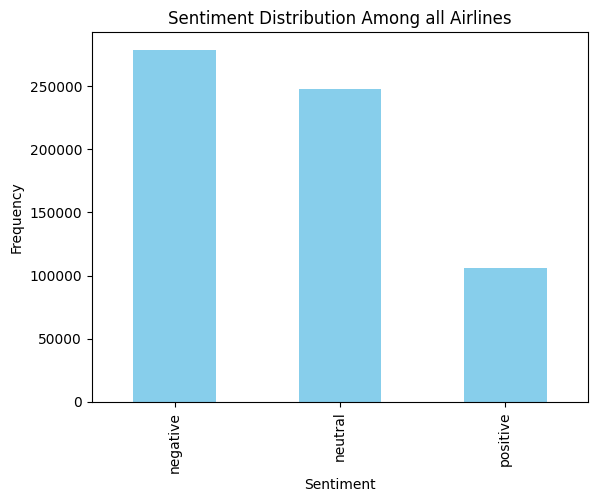

In [58]:
df = pd.DataFrame(texts, columns=['text', 'user_id', 'mentioned_airlines', 'user_mentions', 'label', 'timestamp', 'baggage', 'money', 'staff', 'delay_and_cancellation'])
sentiment_counts = df['label'].value_counts()
sentiment_counts.plot(kind='bar', color='skyblue')
plt.title('Sentiment Distribution Among all Airlines')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.show()

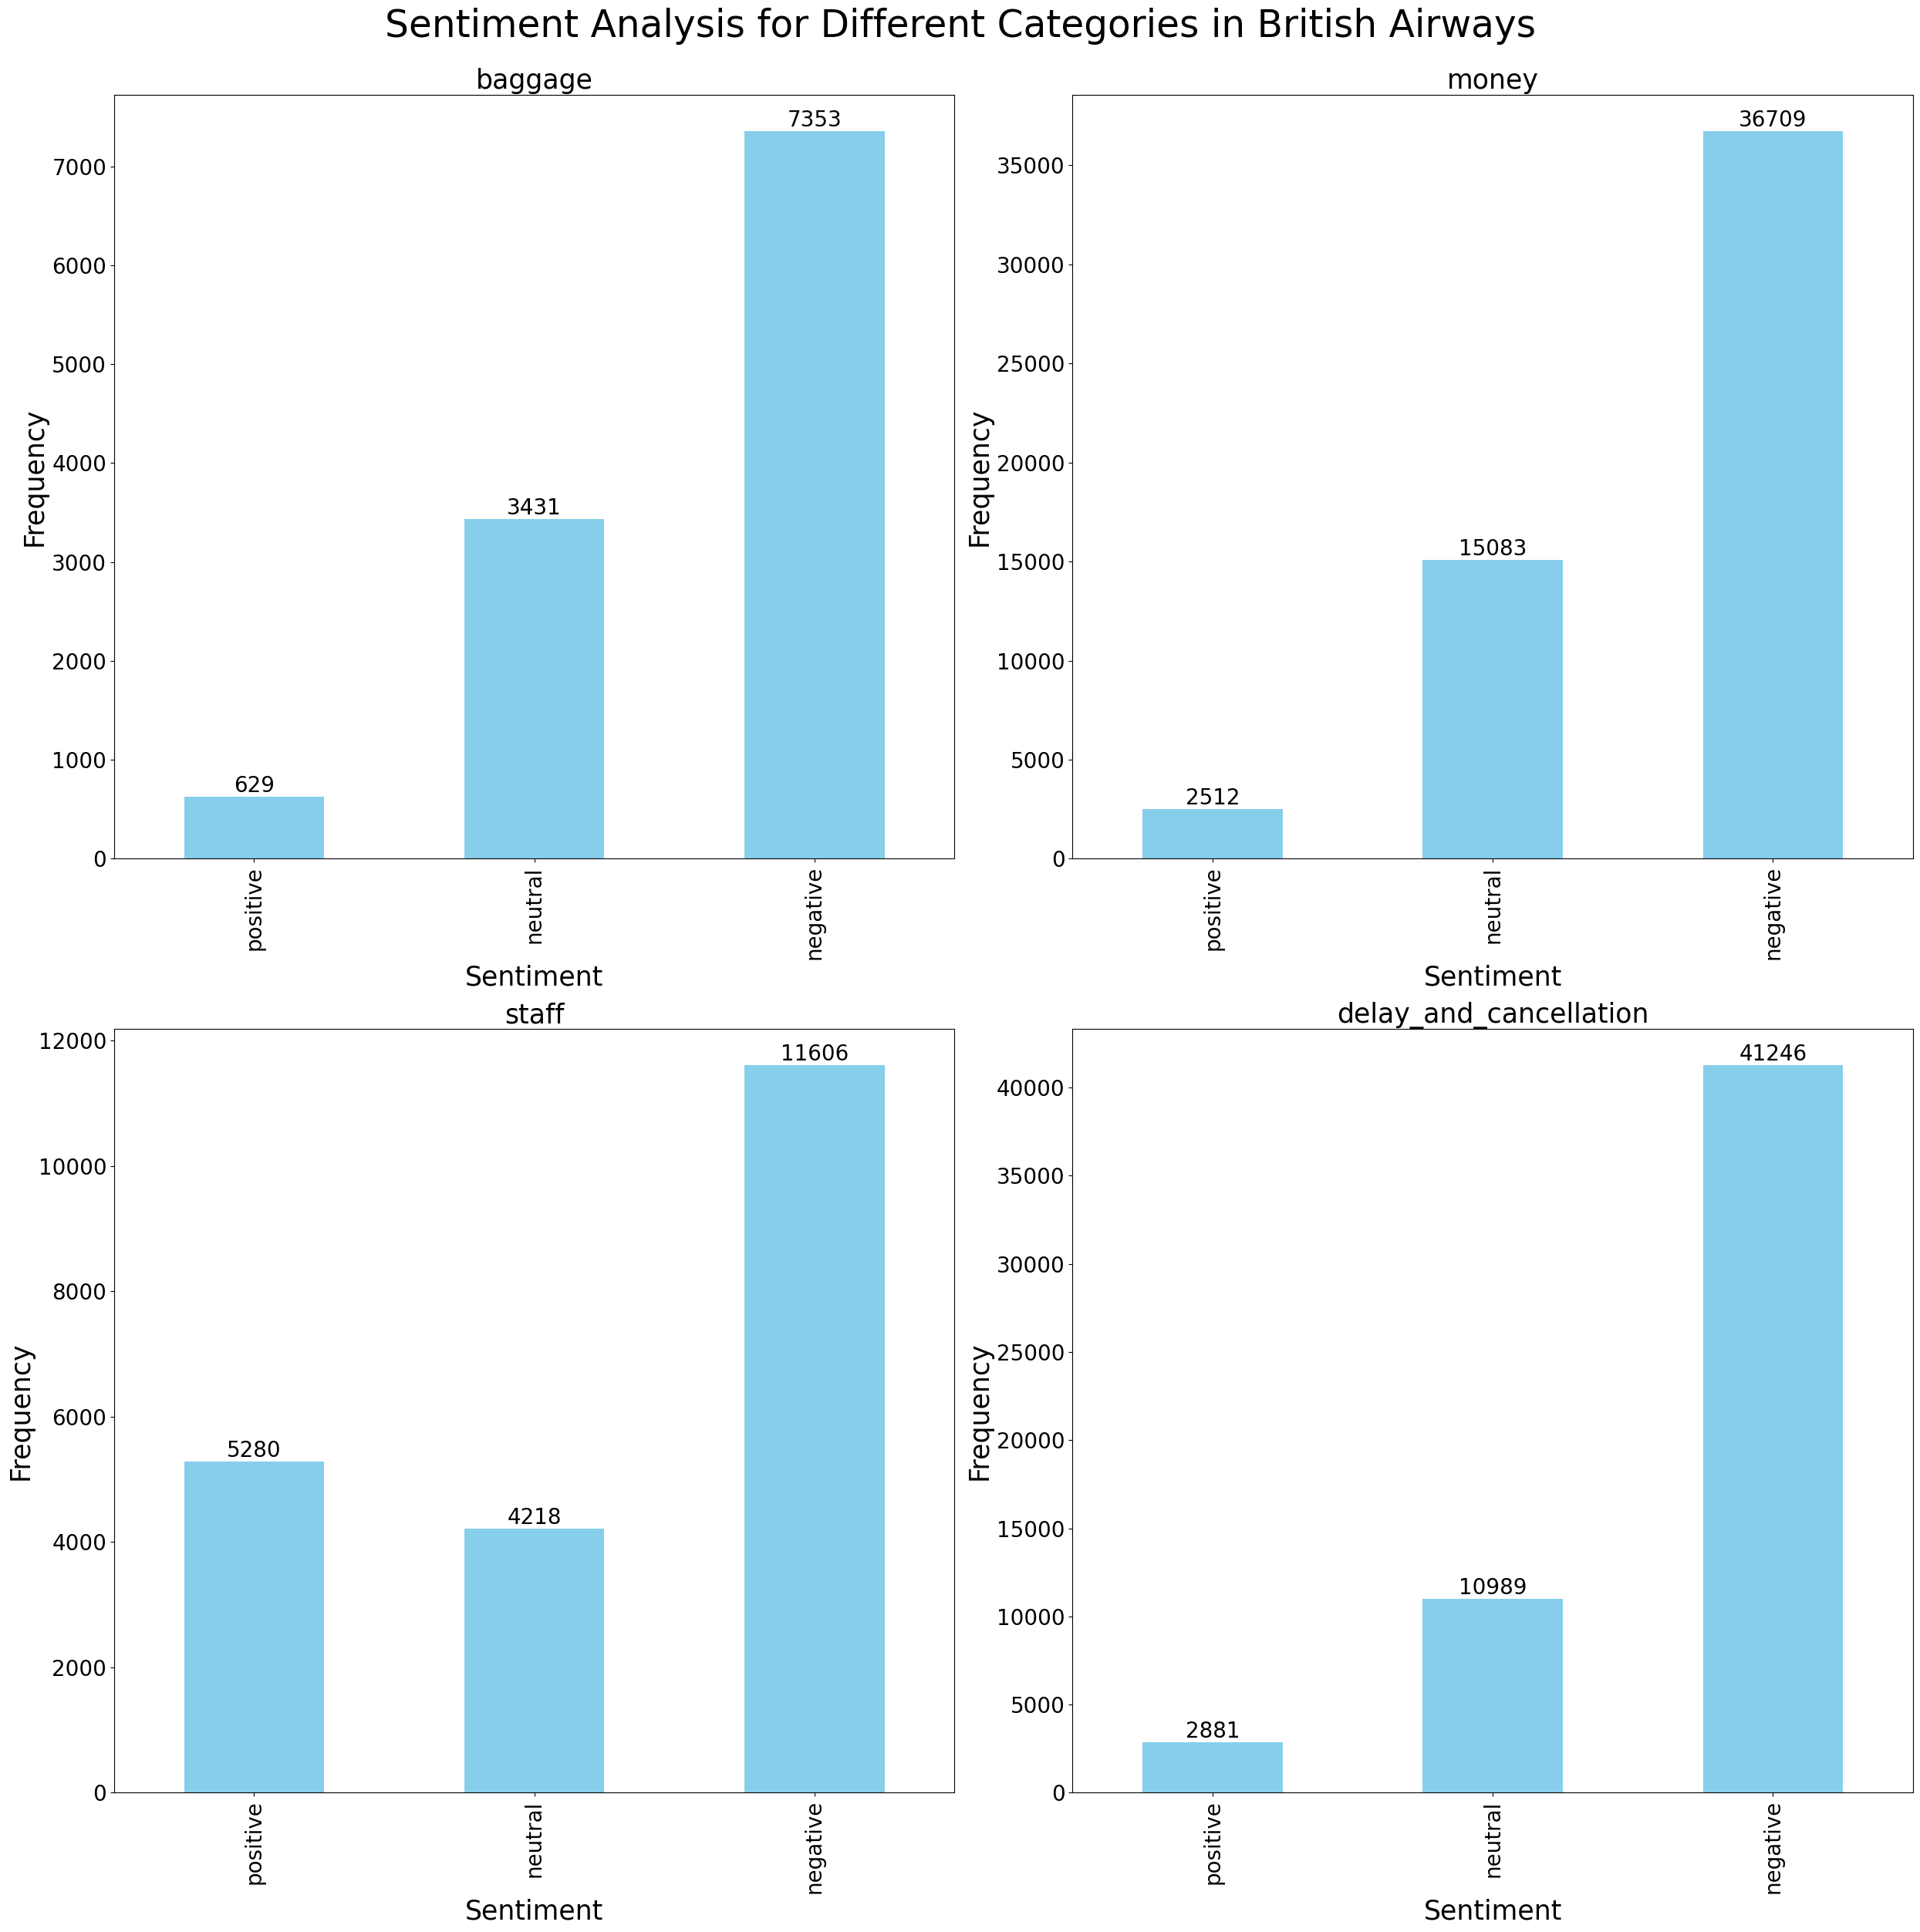

In [66]:
df_ba = df[df['mentioned_airlines'].apply(lambda x: 'British_Airways' in x) | df['user_mentions'].apply(lambda x: '18332190' in x)]

fig, axs = plt.subplots(2, 2, figsize=(25, 25))
fig.suptitle('Sentiment Analysis for Different Categories in British Airways', fontsize=35, y=1)

categories = ['baggage', 'money', 'staff', 'delay_and_cancellation']
sentiments = ['positive', 'neutral', 'negative']

for ax, category in zip(axs.flatten(), categories):
    category_data = df_ba[df_ba[category] == 1]
    
    sentiment_counts = category_data['label'].value_counts()
    sentiment_counts = sentiment_counts.reindex(sentiments)
    bars = sentiment_counts.plot(kind='bar', color='skyblue', ax=ax)
    
    for bar in bars.patches:
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
                int(bar.get_height()), ha='center', va='bottom', fontsize=20)
    
    ax.set_title(category, fontsize=25)
    ax.set_xlabel('Sentiment', fontsize=25)
    ax.set_ylabel('Frequency', fontsize=25)
    ax.tick_params(axis='both', which='major', labelsize=20)

plt.tight_layout()
plt.show()

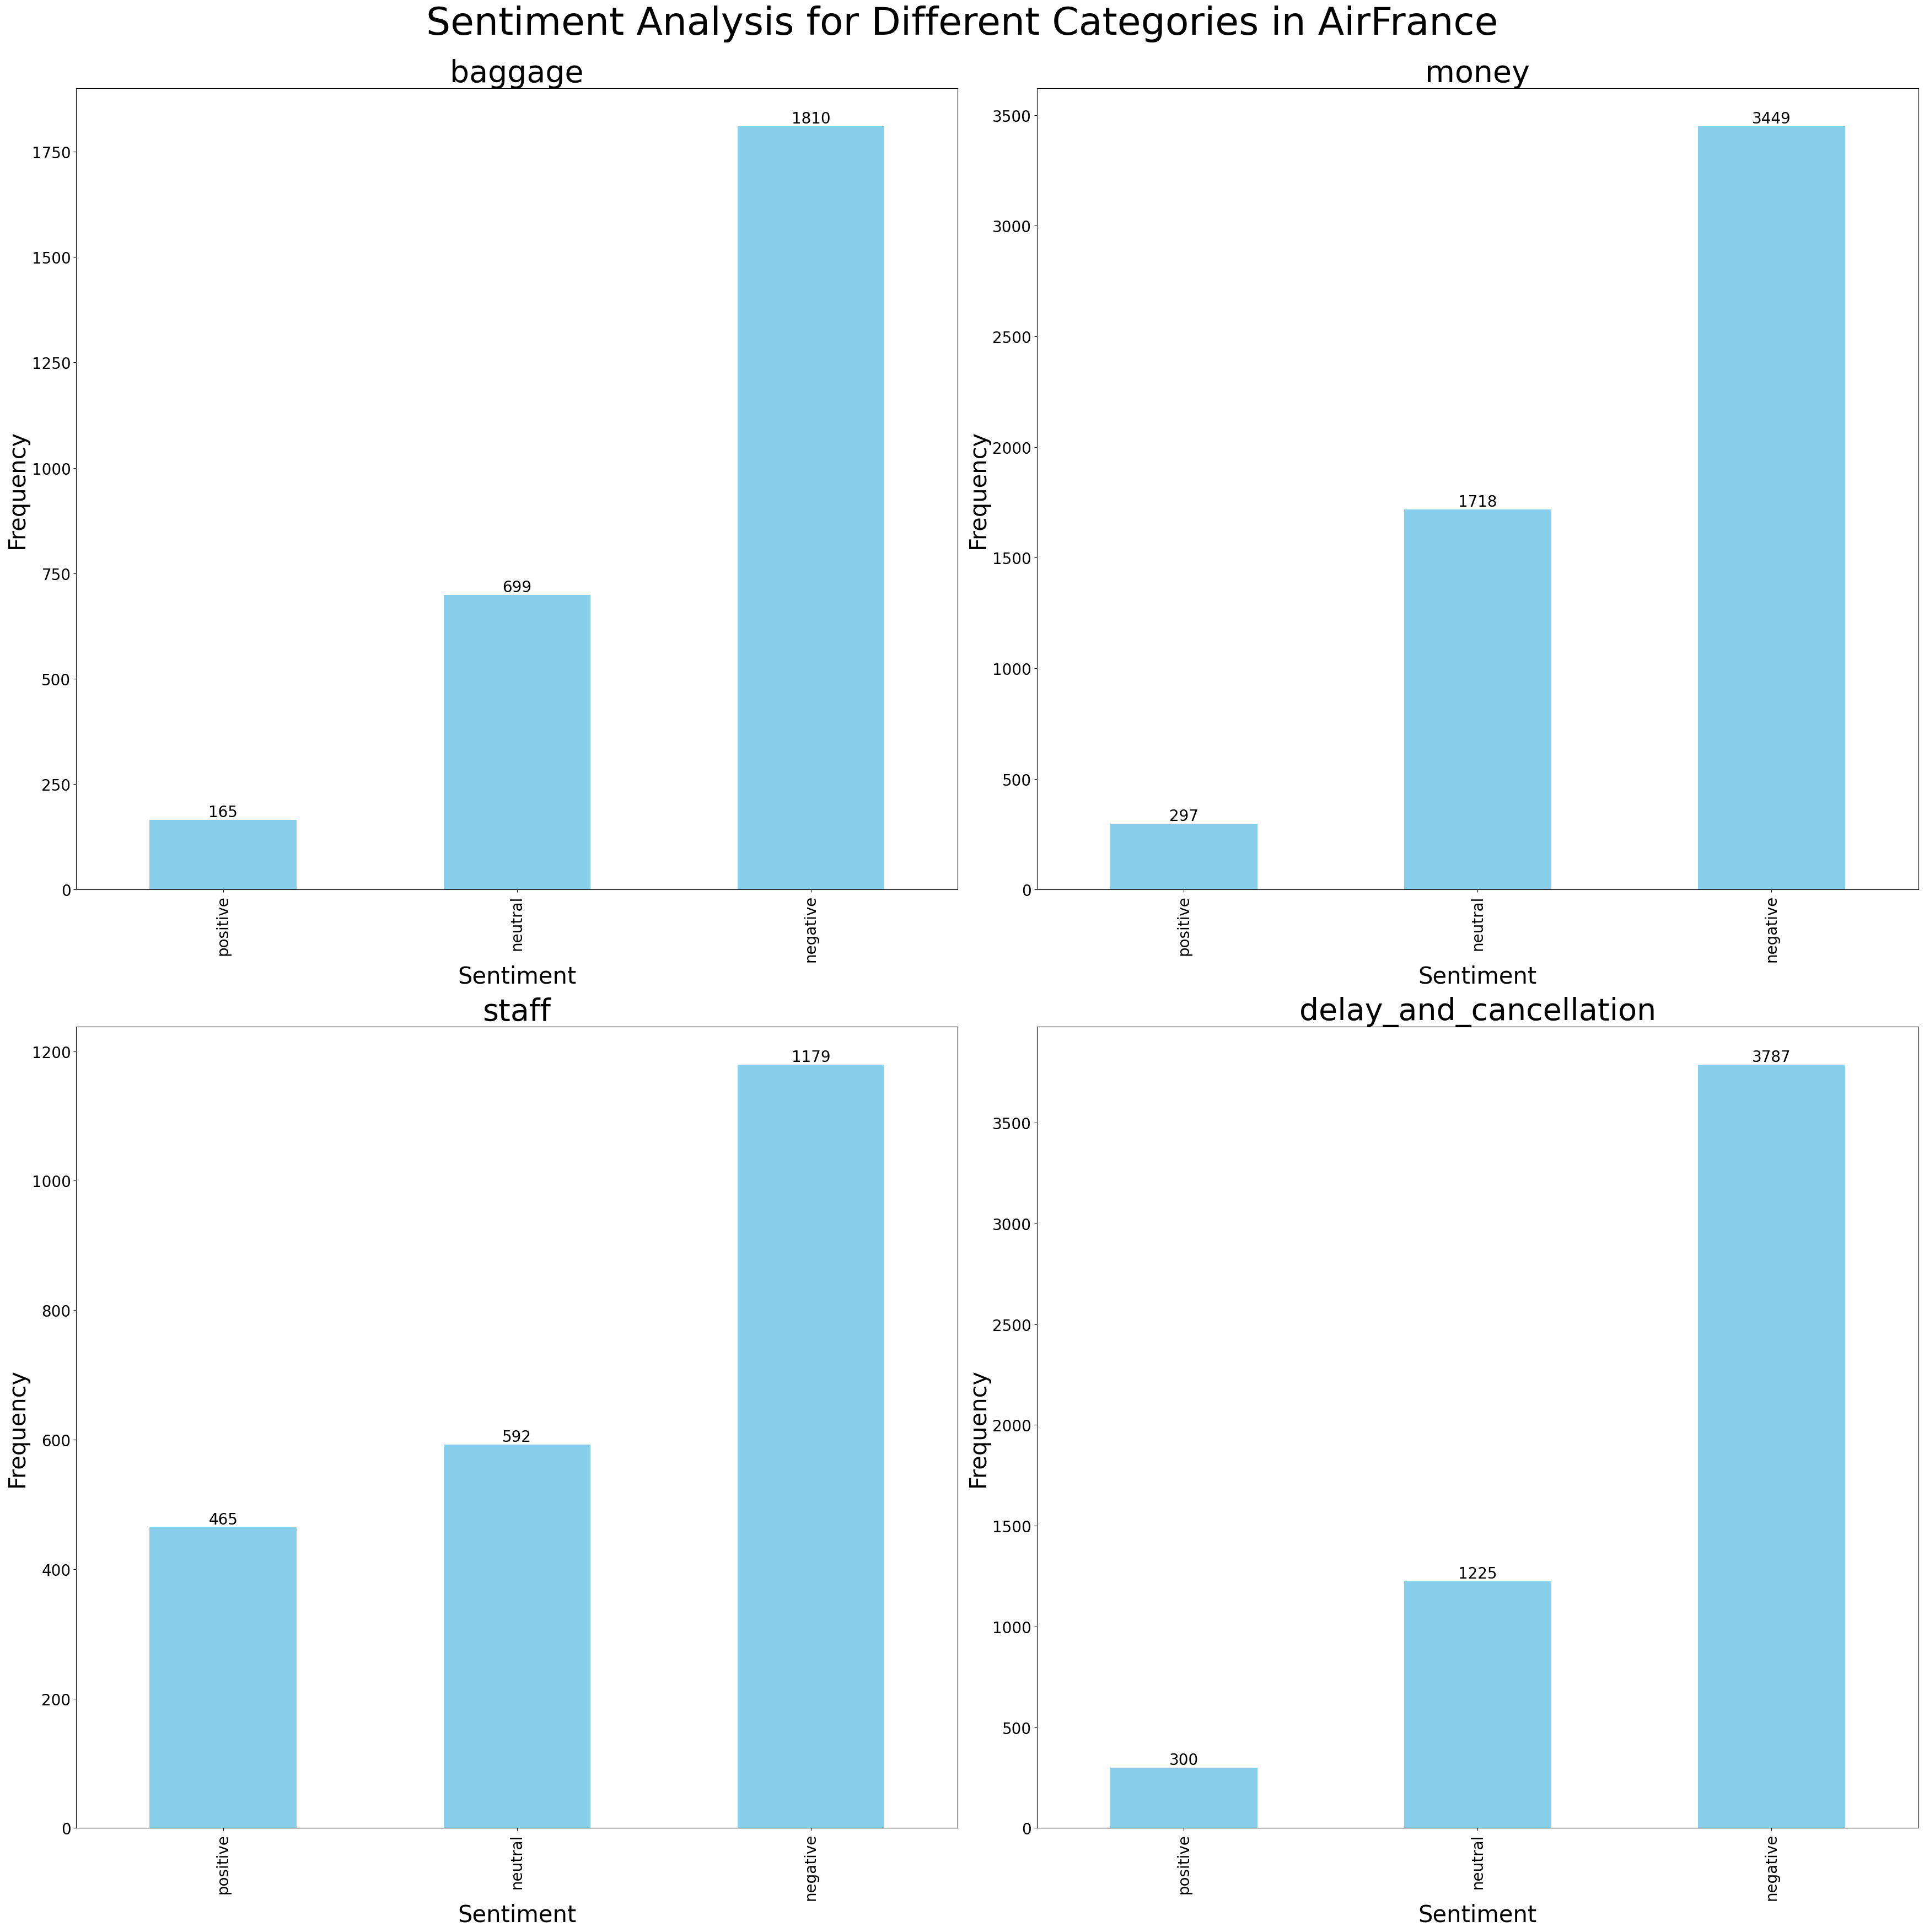

In [67]:
df_ba = df[df['mentioned_airlines'].apply(lambda x: 'AirFrance' in x) | df['user_mentions'].apply(lambda x: '106062176' in x)]

fig, axs = plt.subplots(2, 2, figsize=(35, 35))
fig.suptitle('Sentiment Analysis for Different Categories in AirFrance', fontsize=50, y=1)

categories = ['baggage', 'money', 'staff', 'delay_and_cancellation']
sentiments = ['positive', 'neutral', 'negative']

for ax, category in zip(axs.flatten(), categories):
    category_data = df_ba[df_ba[category] == 1]
    
    sentiment_counts = category_data['label'].value_counts()
    sentiment_counts = sentiment_counts.reindex(sentiments)
    bars = sentiment_counts.plot(kind='bar', color='skyblue', ax=ax)
    
    for bar in bars.patches:
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
                int(bar.get_height()), ha='center', va='bottom', fontsize=20)
    
    ax.set_title(category, fontsize=40)
    ax.set_xlabel('Sentiment', fontsize=30)
    ax.set_ylabel('Frequency', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=20)

plt.tight_layout()
plt.show()

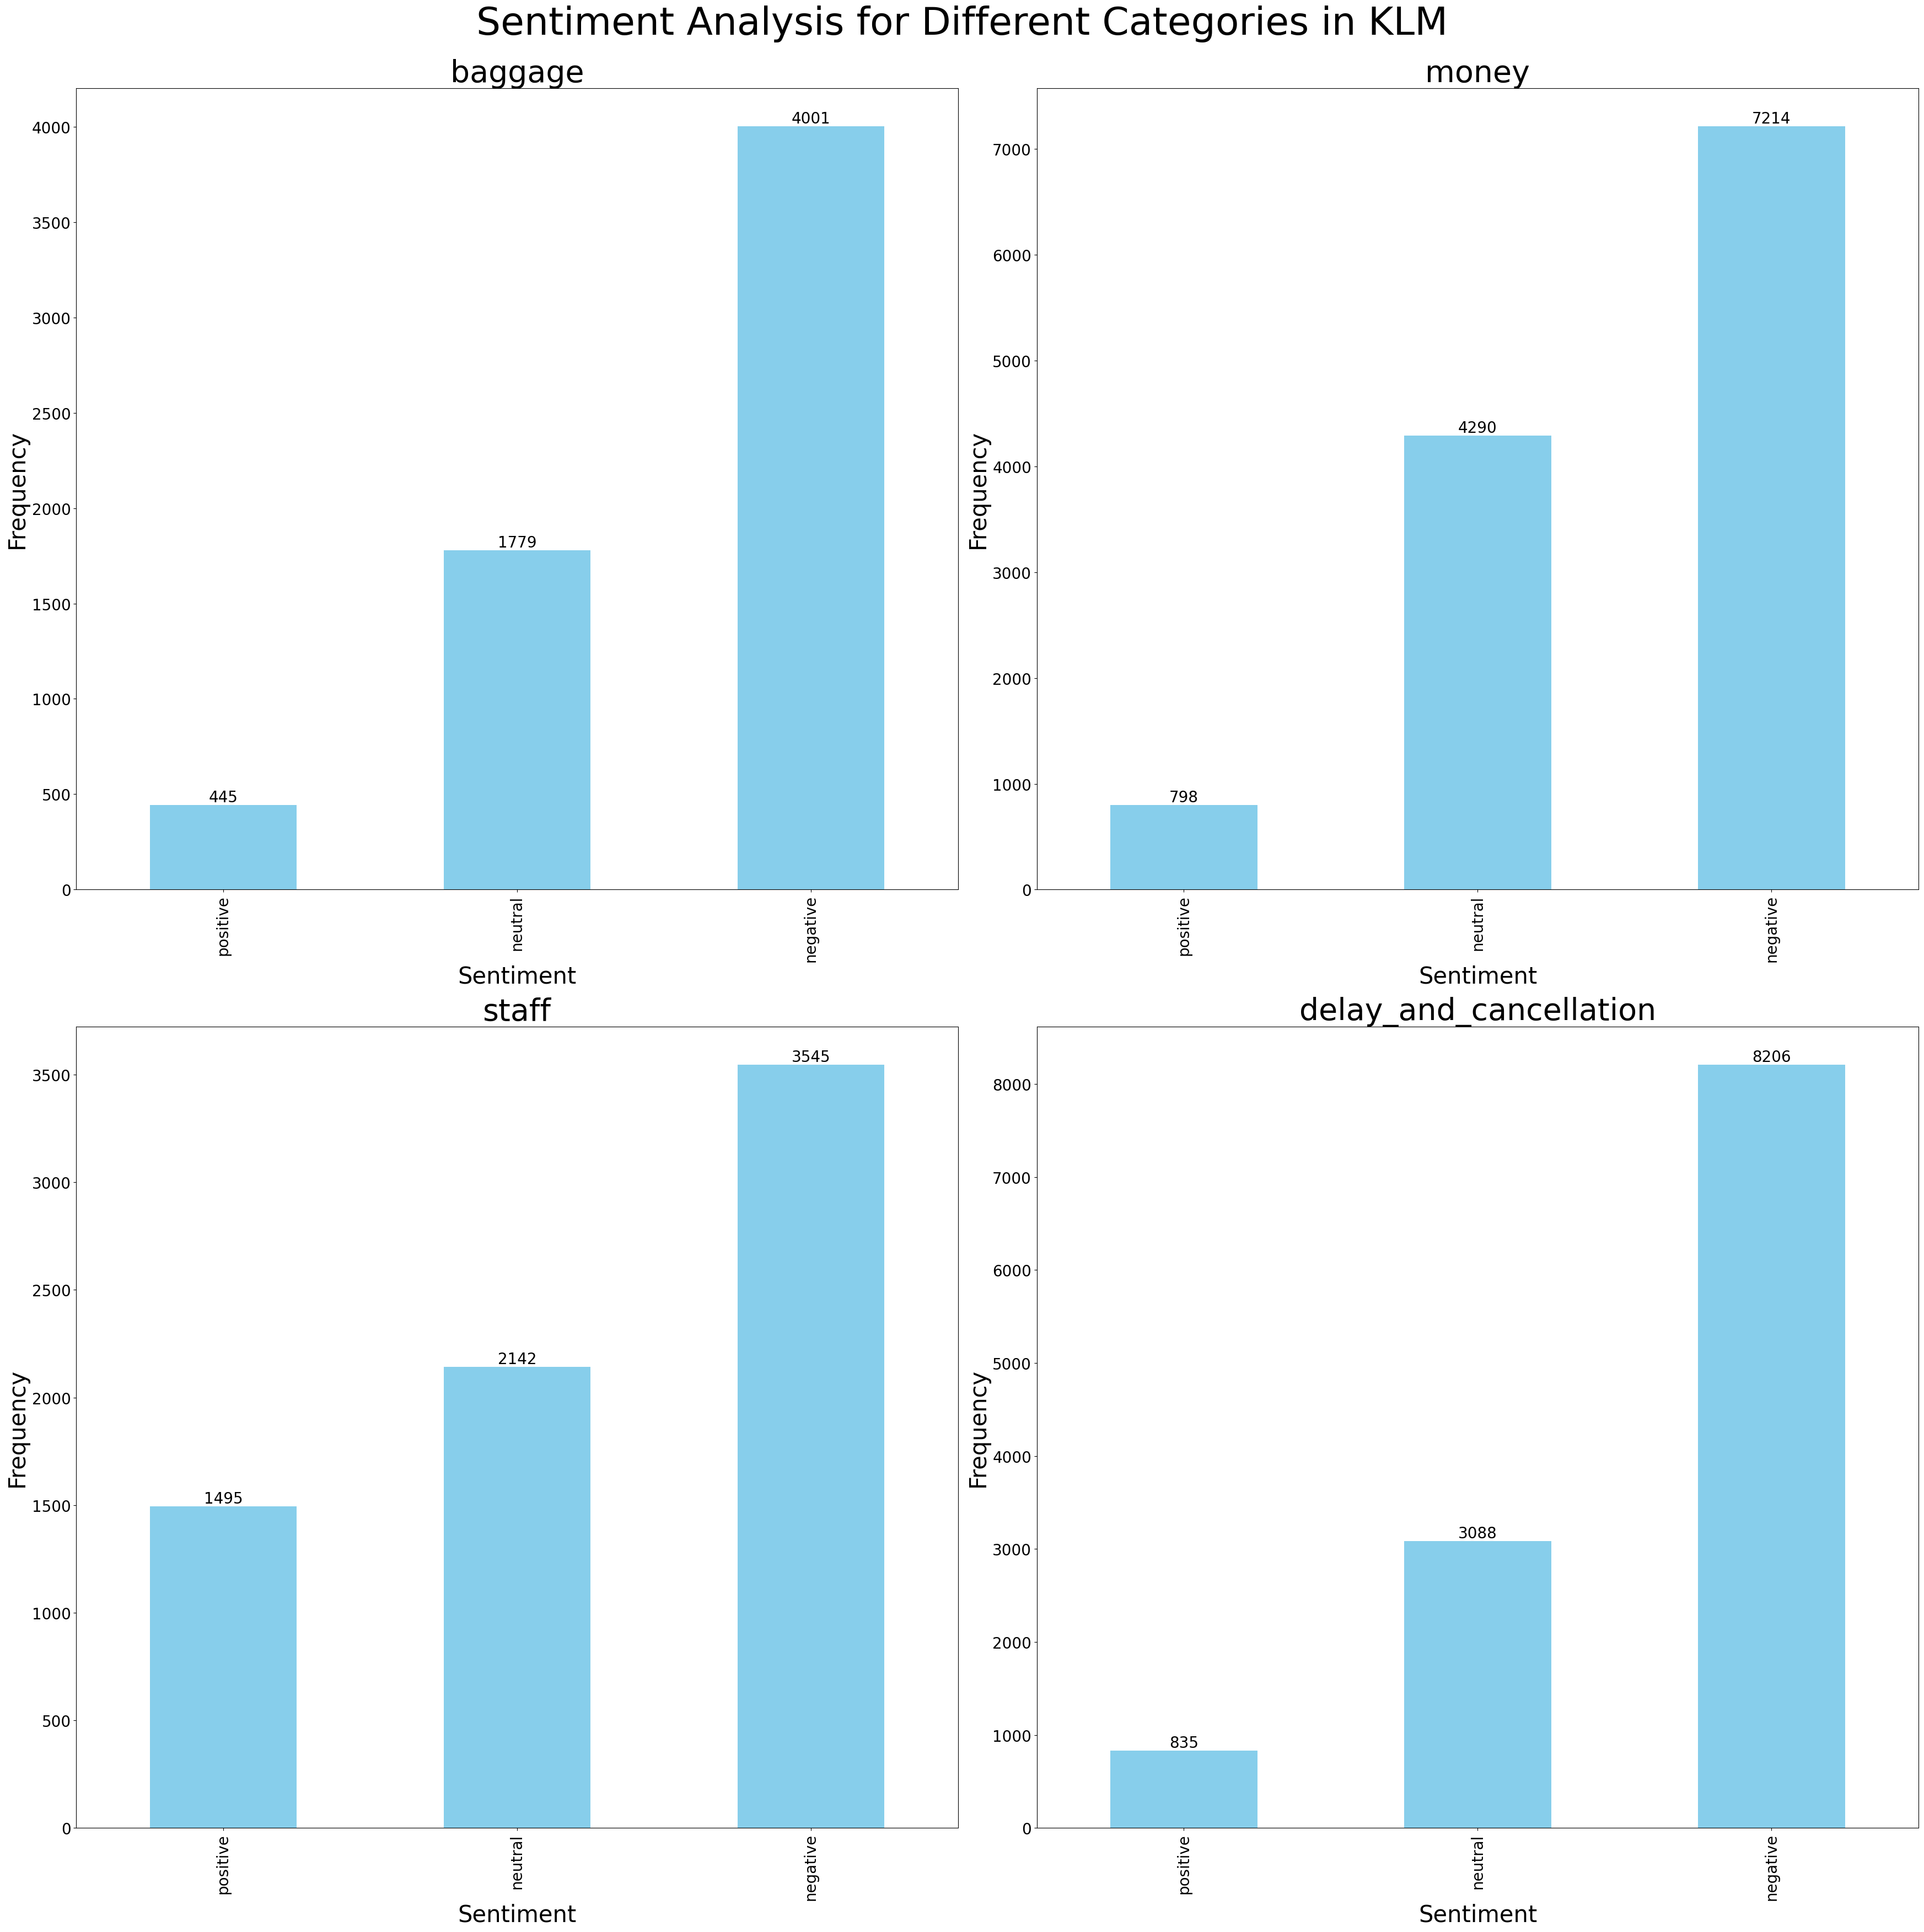

In [68]:
df_ba = df[df['mentioned_airlines'].apply(lambda x: 'KLM' in x) | df['user_mentions'].apply(lambda x: '56377143' in x)]

fig, axs = plt.subplots(2, 2, figsize=(35, 35))
fig.suptitle('Sentiment Analysis for Different Categories in KLM', fontsize=50, y=1)

categories = ['baggage', 'money', 'staff', 'delay_and_cancellation']
sentiments = ['positive', 'neutral', 'negative']

for ax, category in zip(axs.flatten(), categories):
    category_data = df_ba[df_ba[category] == 1]
    
    sentiment_counts = category_data['label'].value_counts()
    sentiment_counts = sentiment_counts.reindex(sentiments)
    bars = sentiment_counts.plot(kind='bar', color='skyblue', ax=ax)
    
    for bar in bars.patches:
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
                int(bar.get_height()), ha='center', va='bottom', fontsize=20)
    
    ax.set_title(category, fontsize=40)
    ax.set_xlabel('Sentiment', fontsize=30)
    ax.set_ylabel('Frequency', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=20)

plt.tight_layout()
plt.show()

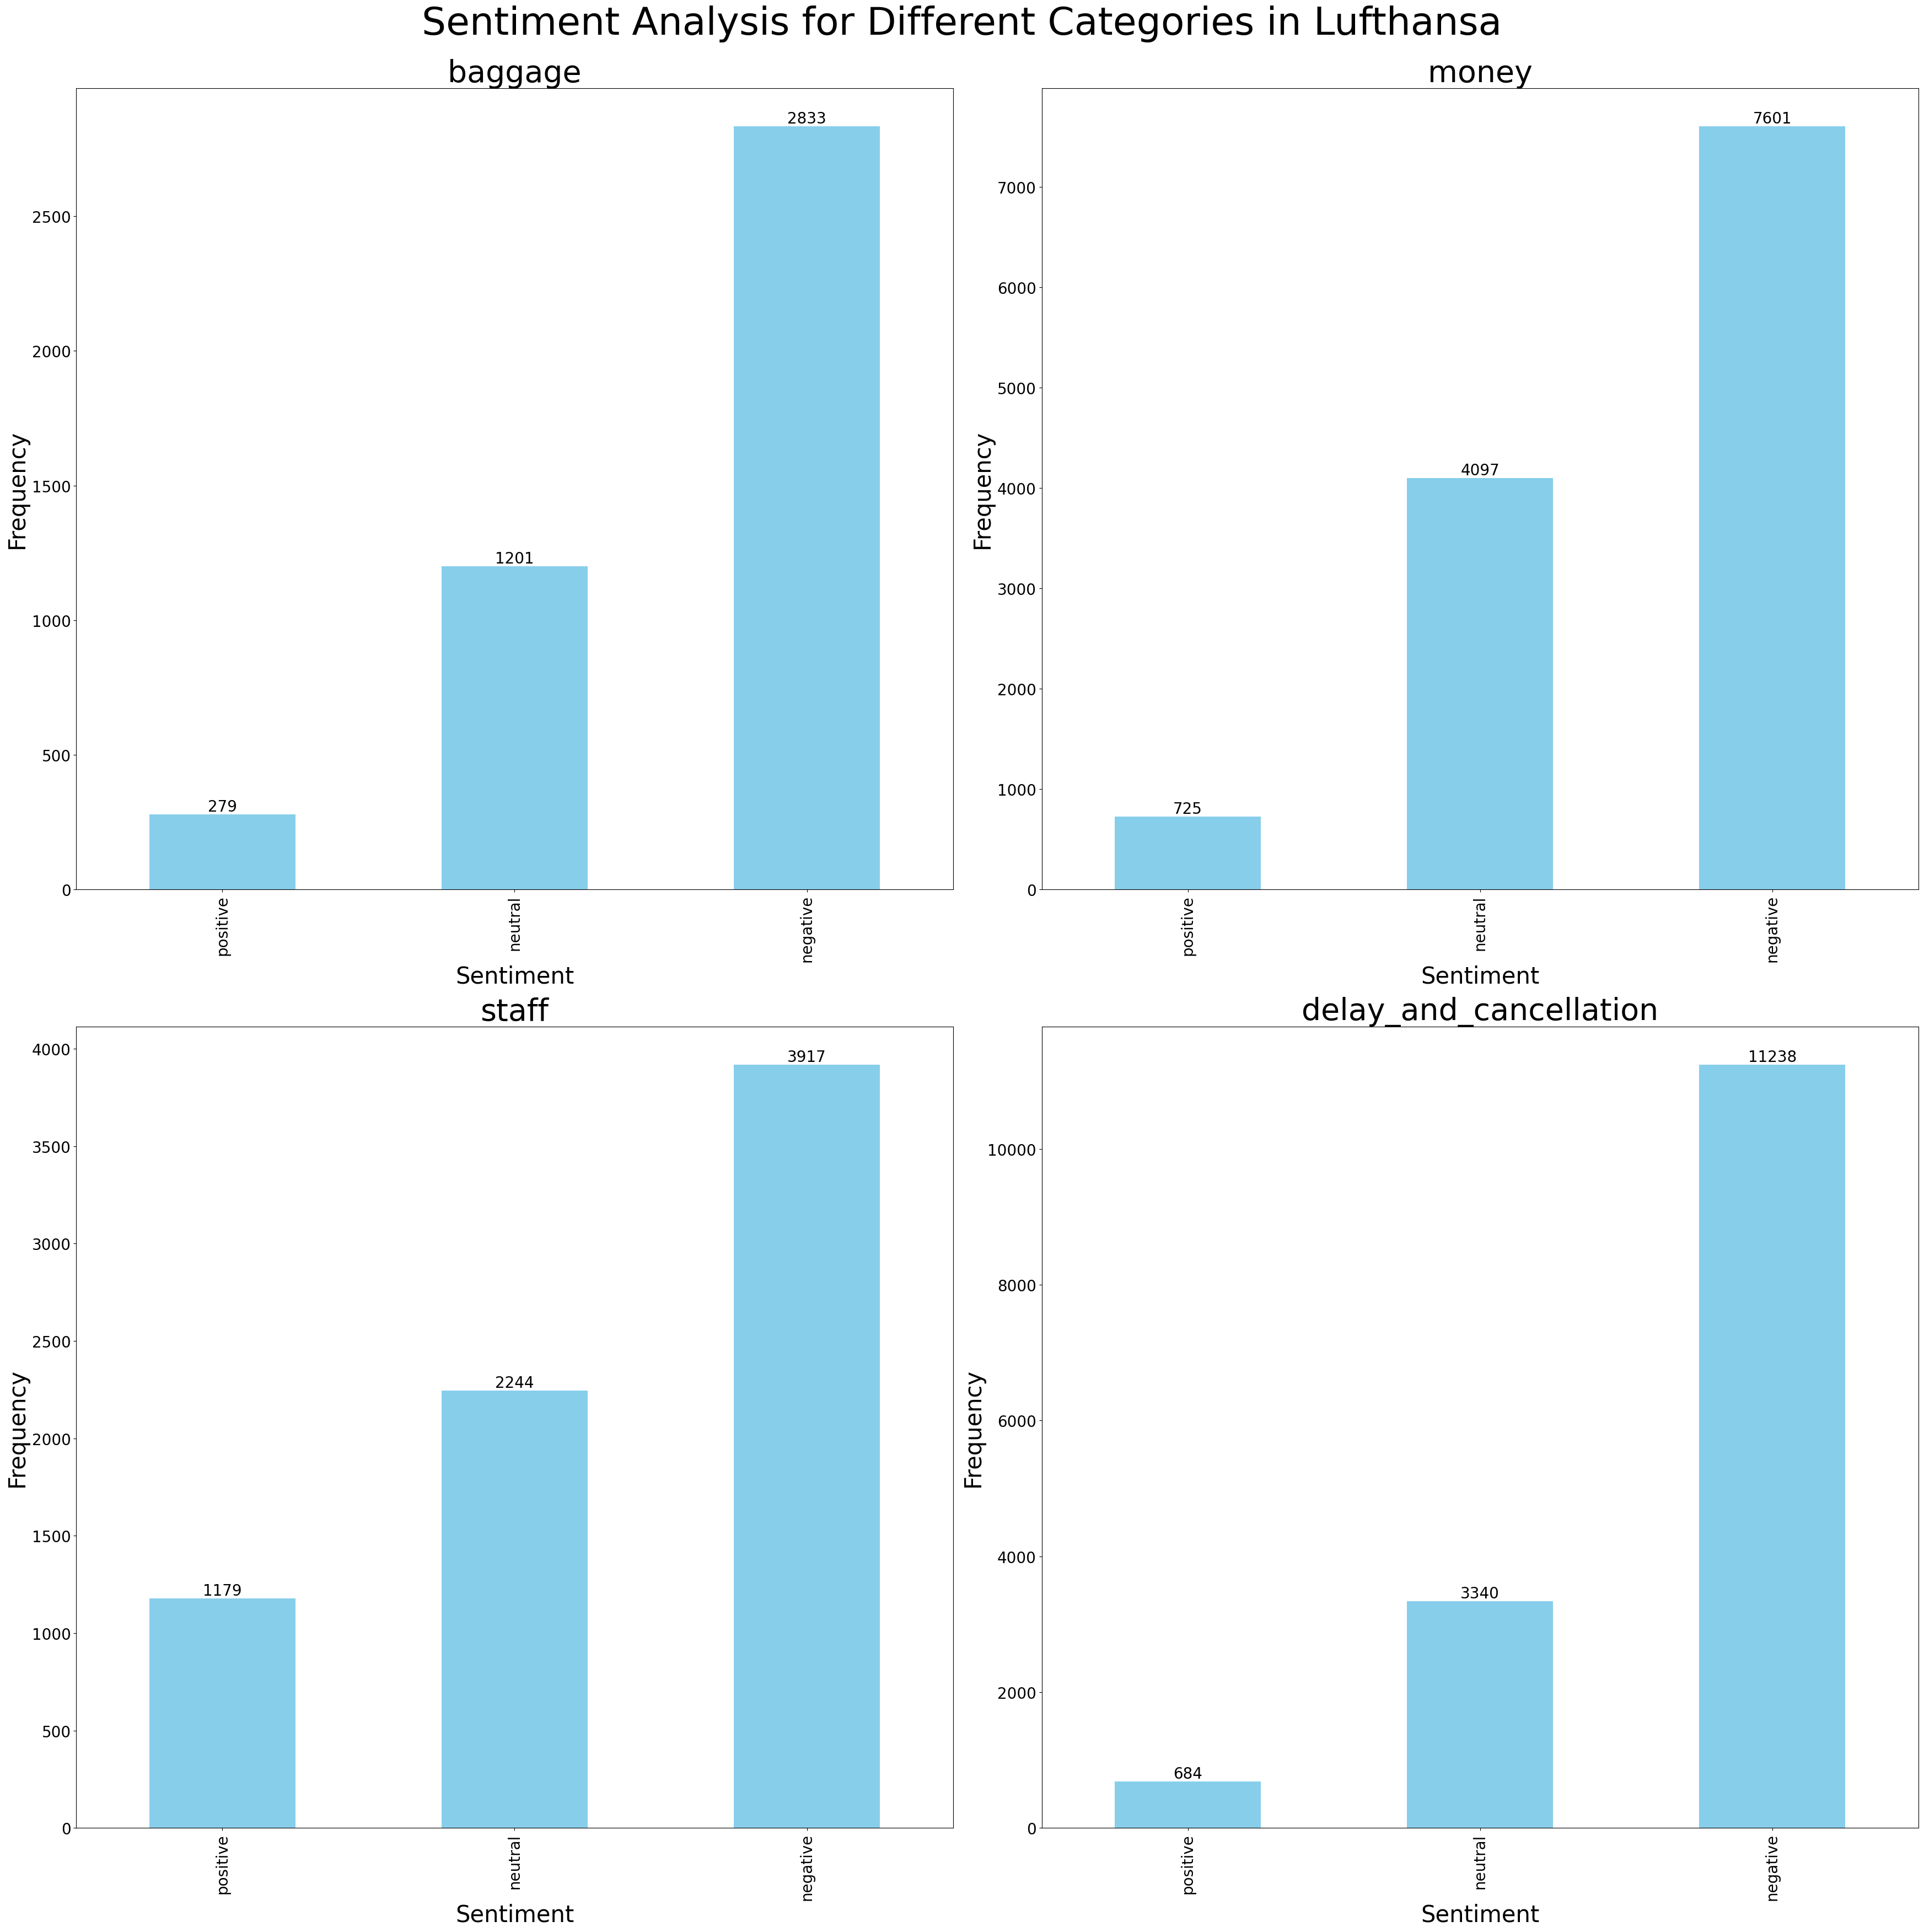

In [69]:
df_ba = df[df['mentioned_airlines'].apply(lambda x: 'Lufthansa' in x) | df['user_mentions'].apply(lambda x: '124476322' in x)]

fig, axs = plt.subplots(2, 2, figsize=(35, 35))
fig.suptitle('Sentiment Analysis for Different Categories in Lufthansa', fontsize=50, y=1)

categories = ['baggage', 'money', 'staff', 'delay_and_cancellation']
sentiments = ['positive', 'neutral', 'negative']

for ax, category in zip(axs.flatten(), categories):
    category_data = df_ba[df_ba[category] == 1]
    
    sentiment_counts = category_data['label'].value_counts()
    sentiment_counts = sentiment_counts.reindex(sentiments)
    bars = sentiment_counts.plot(kind='bar', color='skyblue', ax=ax)
    
    for bar in bars.patches:
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
                int(bar.get_height()), ha='center', va='bottom', fontsize=20)
    
    ax.set_title(category, fontsize=40)
    ax.set_xlabel('Sentiment', fontsize=30)
    ax.set_ylabel('Frequency', fontsize=30)
    ax.tick_params(axis='both', which='major', labelsize=20)

plt.tight_layout()
plt.show()